k-최근접 이웃 회귀

데이터 준비

In [3]:
# 지도 학습 알고리즘은 크게 분류와 회귀(regression)으로 나뉜다. 분류는 말 그대로 샘플의 몇 개의 클래스 중 하나로 분류하는 문제이다.
# 회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다. ex) 내년도 성장률 예측, 배달 도착시간 예측

# k-최근접 이웃 분류 알고리즘은 간단하다. 예측하려는 샘플에 가장 가까운 샘플 k개를 선택후 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측한다.
# k-최근점 이웃'회귀'도 간단하다. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택합니다. 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치이다.

# 이웃 샘플의 수치를 사용해 새로운 샘플 X의 타깃을 예측하는 간단한 방법은 무엇이 있을까? 바로 이 수치들의 평균을 구하면 된다.

In [2]:
import numpy as np

In [3]:
# 2장 1절에서는 파이썬 리스트에서 넘파이 배열로 변환했지만 여기서는 바로 넘파이 배열에서 만들겠습니다.
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
    1000.0, 1000.0]
    )

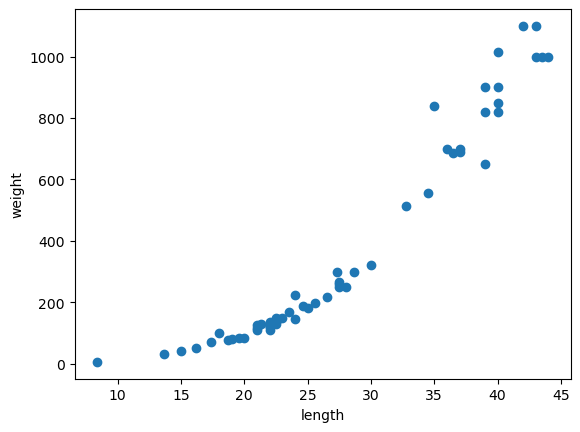

In [4]:
# 먼저 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려 확인해보자
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 2장에서 했듯이 농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누겠습니다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [8]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다. perch_length가 1차원 배열이기 때문에 이를 나눈 train_input, test_input도 1차원 배열이다.
# 이런 1차원 배열을 1개의 열이 있는 2차원 배열로 바꾸어야 한다.

# 파이썬에서 1차원 배열의 크기는 원소가 1개인 튜플로 나타낸다. 예로 [1,2,3] 크기는 (3, )이다. 이를 2차원 배열로 만들기 위해 억지로 하나의 열을 추가한다.
# 이렇게 하면 배열의 크기가 (3, 1)이 된다.

# 2장에서는 2개의 특성을 사용했기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했다. 이번 예제에선 특성을 1개만 사용하므로 수동으로 2차원 배열을 만들어야 한다.
# 다행히 넘파이 배열은 크기를 바꿀수 있는 reshape() 메서드를 제공한다. 

# 예로 (4, ) 배열을 (2, 2) 크기로 바꿔보자
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2, 2)
print(test_array.shape)

(4,)
(2, 2)


In [11]:
# 이제 이 메서드를 사용해 train_input과 test_input을 2차원 배열로 바꿔보겠다. train_input의 크기는 (42, )입니다. 이를 2차원 배열인 (42, 1)로 바꿀려면
# train_input.reshape(42, 1)과 같이 사용한다.  ex) 크기에 -1을 지정하면 나머지 원소 개수로 모두 채우기

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
# 성공적으로 2차원 배열로 변환, 이렇게 reshape(-1, 1)과 같이 사용하면 배열의 전체 원소개수를 외우지않아도 된다.

(42, 1) (14, 1)


결정계수(R^2)

In [12]:
# 사이킷런에서 k-최근접 이웃 '회귀' 알고리즘을 구현한 클래스는 KNeighborsRegreesor입니다.
# 이 클래스의 사용법은 KNeighborsClassififer와 매우 비슷하다. 객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하겠다.
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
# 테스트 세트 점수확인
print(knr.score(test_input, test_target))

# 이 점수는 무엇? -> 분류의 경우는 정확도지만, 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능하다 예측하는 값이나 타깃 모두 임의의 수치이기 때문
# 회귀인 경우 이 점수를 결정계수(coefficient of determination)라고 불린다. 또는 간단히 R^2라고 한다.

# 계산법은 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다. 그다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.
# 만약 타깃의 평균 정도를 예측하는 수준이라면(즉 분자와 분모가 비슷해져) R^2는 0에 가까워지고, 예측이 타깃에 아주 가까워지면(분자가 0에 가가워지기 때문에) 1에 가까운 값이 된다.
# R^2 = 1 - (타깃-예측)^2의 합 / (타깃-평균)^2의 합

0.992809406101064


In [15]:
# 0.99면 아주 좋은값이나 정확도 처럼 R^2가 직감적으로 얼마나 좋은지 이해하기는 어렵다. 대신 다른 값을 계산해 보자
# 타깃과 예측한 값 사이의 차이를 구해보면 어느 정도 예측이 벗어났는지 가늠하기 좋습니다.
# 사이킷런은 sklearn.metrices 패키지 아래 여러 측정 도구를 제공한다. 이 중에서 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
# 결과에서 예측이 평균적으로 19g정도 타깃값과 다르다는 것을 알수 있다.
# 지금까지는 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다. 그런데 훈련 세트를 사용해 평가해 보면 어떨까?
# 즉 score() 메서드에 훈련 세트를 전달하여 점수를 출력해보는 것이다. 이값은 테스트 세트의 점수와 다를것이다.

과대적합 vs 과소적합

In [16]:
# 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 점수를 확인하겠다.
print(knr.score(train_input, train_target))

0.9698823289099254


In [17]:
# 모델을 훈련 세트와 테스트 세트에서 평가하면 두 값중 어느 것이 더 높을까?
# 보통 훈련 세트의 점수가 조금더 높게 나온다 -> 왜? 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야겠죠

# 만약 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합(overfitting)되었다고 한다.
# 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다. 훈련 세트에만 잘 맞는 모델을 원하지는 않겠죠

# 반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 어떨까? 이런 경우를 모델이 훈련 세트에 과소적합(underfitting)되었다고 말한다.
# 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우입니다.

# 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 좋다.

In [18]:
# 앞의 k-최근접 이웃 회귀로 평가한 훈련 세트와 테스트 세트의 점수는 어떠한가? 맞다 훈련 세트보다 테스트 세트의 점수가 높으니 과소적합이다.
# 이 문제의 해결책은 모델은 조금 더 복잡하게 만들면 된다. 즉 훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아질 것이다.
# k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다.
# 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고,이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것입니다.

# 여기에서 사이킷런의 k-최근접 이웃 알고리즘의 기본 k값은 5입니다. 이를 3으로 낮추어 보자
knr.n_neighbors = 3

# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [19]:
# k 값을 줄였더니 훈련 세트의 R^2 점수가 높아졌습니다. 그럼 이제 테스트 세트의 점수를 확인해 보자
print(knr.score(test_input, test_target))

0.9746459963987609


In [20]:
# 예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 것 같다. 또한 두 점수의 차이가 크지도 않으므로
# 이 모델이 과대적합이 된 것 같지도 않다. 성공적으로 회귀모델을 훈련시켰다.

In [21]:
# 여기서는 분류가 아니라 회귀 문제이다. 회귀는 임의의 수치를 예측하는 문제이죠
# k-최근접 이웃 회귀 모델은 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다. 그 다음 이웃 샘플의 타깃값을 평균하여 이 샘플의 예측값으로 사용합니다.

# 사이킷런의 회귀모델점수로 R^2, 즉 결정계수 값을 반환한다. 이 값은 1에 가까울수록 좋다. 
# 모델을 훈련하고 나서 훈련 세트와 테스트 세트에 대해 모두 평가 점수를 구할수 있는데 둘이 점수차이가 크거나 테스트 세트의 점수가 너무 낮으면 과대적합이고, 반대로 테스트 세트의 점수가
# 너무 높거나 두 점수가 모두 낮으면 과소적합이다. 일반적으로 훈련 세트의 점수가 테스트 세트보다 조금더 높다.

# 과대적합일 경우 모델을 덜 복잡하게 만들어야 한다. -> k-최근접 이웃의 경우 k값을 늘린다.
# 과소적합일 경우 모델을 더 복잡하게 만들어야 한다. -> k-최근접 이웃의 경우 k값을 줄인다.